In [1]:
DATA_PATH = '/home/kotuzo/DATA_NINJA_COMP/EPIK_Solution/all_data/extracted/transformed/'
SQ_DATA_PATH = '/home/kotuzo/DATA_NINJA_COMP/EPIK_Solution/all_data/extracted/search_queries/'
AD_DATA_PATH = '/home/kotuzo/DATA_NINJA_COMP/EPIK_Solution/all_data/extracted/ads/'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 50)

#### LOAD SAMPLE DATASETS

In [3]:
sq_december = pd.read_csv(SQ_DATA_PATH + 'search_queries_2016_12.csv')

In [4]:
data = pd.read_csv(DATA_PATH + 'transformed2016_12.csv')

In [6]:
data[data['predict_sold'] == 't'].head()

,id,category_id,title,description,predict_sold,predict_replies,predict_views,priceValue,derivative,average,min,max,business,private,arranged,exchange,free,price,new,used,photo_sizes,paidads_id_index,paidads_valid_to
86,1188492022,279,Drewno opalowe okorki,Mam do zaoferowania państwu drewno opałowe - O...,t,0,19,80.0,63.437363,547.0,2.0,1787.0,1,0,1,0,0,0,1,0,NaN,NaN,NaN
97,431771373,279,Drewno opalowe,Drewno opalowe okorki 1mp 80 zl cena do uzgodn...,t,0,45,80.0,63.437363,547.0,2.0,1787.0,0,1,1,0,0,0,1,0,NaN,NaN,NaN
135,7782061,279,Nagrzewnica Master B150CED 44kW,"Wysokiej jakości, przenośna nagrzewnica \nolej...",t,0,16,1400.0,63.437363,547.0,2.0,1787.0,1,0,0,0,0,1,0,1,"{""1"":{""w"":1000,""h"":661},""2"":{""w"":1000,""h"":661}...",NaN,NaN
276,954378023,279,"Suche drewno kominkowe, transport gratis!",Posiadam na sprzedaż suche brzozowe drewno ko...,t,0,68,200.0,63.437363,547.0,2.0,1787.0,0,1,0,0,0,1,1,0,"{""1"":{""w"":640,""h"":360},""2"":{""w"":640,""h"":480}}",NaN,NaN
320,1120147009,279,Drewno kominkowe,Sprzedam drewno opałowe/kominkowe.\nMieszanka ...,t,1,23,170.0,63.437363,547.0,2.0,1787.0,1,0,0,0,0,1,1,0,"{""1"":{""w"":490,""h"":327}}",NaN,NaN


In [154]:
ads_december = pd.read_csv(AD_DATA_PATH + 'ads_2016_12.csv')

/home/kotuzo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### General look at the data

In [5]:
sq_december.describe()

,category_id,sessions_count,parent_id
count,1.569521e+06,1.569265e+06,1.569521e+06
mean,7.853241e+02,1.226198e+01,4.251702e+02
std,5.469724e+02,5.086580e+02,4.516621e+02
min,3.000000e+00,1.000000e+00,0.000000e+00
25%,2.020000e+02,1.000000e+00,8.400000e+01
50%,7.230000e+02,1.000000e+00,1.010000e+02
75%,1.377000e+03,1.000000e+00,6.580000e+02
max,1.525000e+03,8.930600e+04,1.542000e+03


In [8]:
ads_december.describe()

,id,region_id,category_id,subregion_id,district_id,city_id,accurate_location,user_id,paidads_id_index,predict_replies,predict_views,reply_call,reply_sms,reply_chat,reply_call_intent,reply_chat_intent,parent_id,priceValue
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,300503.000000,1.000000e+06,1000000.000000,1.000000e+06,240401.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,9.781990e+05
mean,1.073240e+09,6.597698,581.659224,191.816545,359.424408,1.143435e+09,0.428120,1.070283e+09,5.296355,0.182110,20.173057,0.052911,0.029326,0.099873,0.405012,0.123912,324.56465,5.141957e+02
std,6.198440e+08,4.887037,363.674992,115.602444,178.575694,6.447710e+08,0.494807,6.206489e+08,10.249502,0.811711,61.813223,0.340819,0.223683,0.537003,1.510796,0.619799,383.06405,1.255712e+05
min,4.840000e+02,1.000000,6.000000,1.000000,1.000000,5.016000e+04,0.000000,1.019000e+04,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,1.000000e-02
25%,5.362681e+08,2.000000,230.000000,96.000000,271.000000,5.923137e+08,0.000000,5.318304e+08,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.00000,2.000000e+01
50%,1.073386e+09,6.000000,575.000000,198.000000,355.000000,1.086582e+09,0.000000,1.069378e+09,4.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.00000,4.000000e+01
75%,1.610476e+09,9.000000,728.000000,287.000000,391.000000,1.721964e+09,1.000000,1.607883e+09,4.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,565.00000,1.100000e+02
max,2.147482e+09,18.000000,1525.000000,507.000000,769.000000,2.147005e+09,1.000000,2.147474e+09,85.000000,71.000000,9706.000000,44.000000,22.000000,71.000000,162.000000,83.000000,1542.00000,1.234568e+08


In [9]:
sq_december.head()

,sorting_date,phrase,category_id,sessions_count,parent_id,name_pl
0,2016-11-21,NaN,15.0,85916.0,1307,Wynajem
1,2016-11-21,kawalerka,15.0,968.0,1307,Wynajem
2,2016-11-21,mieszkanie,15.0,183.0,1307,Wynajem
3,2016-11-21,warszawa,15.0,154.0,1307,Wynajem
4,2016-11-21,2 pokoje,15.0,150.0,1307,Wynajem


In [10]:
sq_december['category_id'].nunique()

387

In [12]:
sq_december[sq_december['category_id'] == 15].count()

sorting_date      54751
phrase            54732
category_id       54751
sessions_count    54751
parent_id         54751
name_pl           54751
dtype: int64

In [14]:
ads_december['category_id'].nunique()

248

In [13]:
ads_december[ads_december['category_id'] == 15].count()

id                   0
region_id            0
category_id          0
subregion_id         0
district_id          0
city_id              0
accurate_location    0
user_id              0
sorting_date         0
created_at_first     0
valid_to             0
title                0
description          0
full_description     0
has_phone            0
params               0
private_business     0
has_person           0
photo_sizes          0
paidads_id_index     0
paidads_valid_to     0
predict_sold         0
predict_replies      0
predict_views        0
reply_call           0
reply_sms            0
reply_chat           0
reply_call_intent    0
reply_chat_intent    0
parent_id            0
name_pl              0
priceType            0
priceValue           0
state                0
type                 0
mark                 0
size                 0
dtype: int64

In [5]:
raw_data = pd.read_csv('/home/kotuzo/DATA_NINJA_COMP/EPIK_Solution/all_data/ads_2016_12_01')
sq_data = pd.read_csv(SQ_DATA_PATH + 'search_queries_2016_12.csv')

In [16]:
raw_data.head()

,id,region_id,category_id,subregion_id,district_id,city_id,accurate_location,user_id,sorting_date,created_at_first,valid_to,title,description,full_description,has_phone,params,private_business,has_person,photo_sizes,paidads_id_index,paidads_valid_to,predict_sold,predict_replies,predict_views,reply_call,reply_sms,reply_chat,reply_call_intent,reply_chat_intent
0,471113355,3,279,303,385.0,1721963681,0,2052953831,2016-11-28 09:11:10,2012-07-04 09:18:13,2016-12-28 09:11:10,Ekogroszek workowany Pieklorz <CITY> - POLMARK...,"Ekogroszek Pieklorz chwałowicki - ""Iskierka zi...","Ekogroszek Pieklorz chwałowicki - ""Iskierka zi...",t,price<=>price<br>price<=>940<br>state<=>new,business,t,"{""1"":{""w"":489,""h"":700}}",NaN,NaN,f,0,19,0,0,0,0,0
1,611926916,15,292,21,NaN,959198913,0,1491762096,2016-11-29 07:50:45,2012-07-04 20:39:19,2016-12-29 07:50:45,Poliwęglan komorowy kanalikowy z dostawą na te...,Witamy na stronie firmy K&M Technic\n\nJesteśm...,Witamy na stronie firmy K&M Technic\n\nJesteśm...,t,price<=>price<br>price<=>19<br>state<=>new,business,t,"{""2"":{""w"":1000,""h"":563},""1"":{""w"":933,""h"":700},...",4.0,2016-12-18 06:40:42,f,2,112,2,0,0,9,0
2,222597611,4,1505,102,287.0,239224901,0,530730361,2016-11-25 13:22:18,2012-07-07 07:22:04,2016-12-25 13:22:18,DJ na wesele <CITY> DJ Weselny <CITY> PROMOCYJ...,Skorzystaj z cen promocyjnych od Stycznia do M...,Skorzystaj z cen promocyjnych od Stycznia do M...,t,NaN,private,t,"{""6"":{""w"":640,""h"":426},""1"":{""w"":1000,""h"":666},...",NaN,NaN,f,1,9,0,0,1,2,1
3,660662971,2,575,287,381.0,2056888083,0,1581613515,2016-11-23 21:43:16,2012-06-26 22:02:18,2016-12-23 21:50:18,Obrazy jak oryginały,Obrazy w porządnych ramach ( robione na zamówi...,Obrazy w porządnych ramach ( robione na zamówi...,t,price<=>price<br>price<=>130<br>state<=>used,private,t,"{""2"":{""w"":346,""h"":461},""1"":{""w"":616,""h"":461}}",NaN,NaN,f,0,1,0,0,0,0,0
4,144496390,1,279,190,NaN,1640171958,0,1447566944,2016-11-26 13:55:17,2012-07-06 11:30:25,2016-12-26 14:36:59,"KOMINEK MARKOWY, efekt żarzenia, ""<SURNAME> <N...","KOMINEK FIRMY ZEPTER ""<SURNAME> <NAME> Serce"" ...","KOMINEK FIRMY ZEPTER ""<SURNAME> <NAME> Serce"" ...",t,price<=>arranged<br>price<=>950<br>state<=>new,private,t,"{""1"":{""w"":616,""h"":461},""2"":{""w"":616,""h"":461},""...",NaN,NaN,f,0,13,0,0,0,0,0


In [6]:
sq_data.head()

,sorting_date,phrase,category_id,sessions_count,parent_id,name_pl
0,2016-11-21,NaN,15.0,85916.0,1307,Wynajem
1,2016-11-21,kawalerka,15.0,968.0,1307,Wynajem
2,2016-11-21,mieszkanie,15.0,183.0,1307,Wynajem
3,2016-11-21,warszawa,15.0,154.0,1307,Wynajem
4,2016-11-21,2 pokoje,15.0,150.0,1307,Wynajem


In [17]:
raw_data['desc_length'] = raw_data['full_description'].apply(len)

In [18]:
raw_data.head()

,id,region_id,category_id,subregion_id,district_id,city_id,accurate_location,user_id,sorting_date,created_at_first,valid_to,title,description,full_description,has_phone,params,private_business,has_person,photo_sizes,paidads_id_index,paidads_valid_to,predict_sold,predict_replies,predict_views,reply_call,reply_sms,reply_chat,reply_call_intent,reply_chat_intent,desc_length
0,471113355,3,279,303,385.0,1721963681,0,2052953831,2016-11-28 09:11:10,2012-07-04 09:18:13,2016-12-28 09:11:10,Ekogroszek workowany Pieklorz <CITY> - POLMARK...,"Ekogroszek Pieklorz chwałowicki - ""Iskierka zi...","Ekogroszek Pieklorz chwałowicki - ""Iskierka zi...",t,price<=>price<br>price<=>940<br>state<=>new,business,t,"{""1"":{""w"":489,""h"":700}}",NaN,NaN,f,0,19,0,0,0,0,0,1819
1,611926916,15,292,21,NaN,959198913,0,1491762096,2016-11-29 07:50:45,2012-07-04 20:39:19,2016-12-29 07:50:45,Poliwęglan komorowy kanalikowy z dostawą na te...,Witamy na stronie firmy K&M Technic\n\nJesteśm...,Witamy na stronie firmy K&M Technic\n\nJesteśm...,t,price<=>price<br>price<=>19<br>state<=>new,business,t,"{""2"":{""w"":1000,""h"":563},""1"":{""w"":933,""h"":700},...",4.0,2016-12-18 06:40:42,f,2,112,2,0,0,9,0,1182
2,222597611,4,1505,102,287.0,239224901,0,530730361,2016-11-25 13:22:18,2012-07-07 07:22:04,2016-12-25 13:22:18,DJ na wesele <CITY> DJ Weselny <CITY> PROMOCYJ...,Skorzystaj z cen promocyjnych od Stycznia do M...,Skorzystaj z cen promocyjnych od Stycznia do M...,t,NaN,private,t,"{""6"":{""w"":640,""h"":426},""1"":{""w"":1000,""h"":666},...",NaN,NaN,f,1,9,0,0,1,2,1,1674
3,660662971,2,575,287,381.0,2056888083,0,1581613515,2016-11-23 21:43:16,2012-06-26 22:02:18,2016-12-23 21:50:18,Obrazy jak oryginały,Obrazy w porządnych ramach ( robione na zamówi...,Obrazy w porządnych ramach ( robione na zamówi...,t,price<=>price<br>price<=>130<br>state<=>used,private,t,"{""2"":{""w"":346,""h"":461},""1"":{""w"":616,""h"":461}}",NaN,NaN,f,0,1,0,0,0,0,0,226
4,144496390,1,279,190,NaN,1640171958,0,1447566944,2016-11-26 13:55:17,2012-07-06 11:30:25,2016-12-26 14:36:59,"KOMINEK MARKOWY, efekt żarzenia, ""<SURNAME> <N...","KOMINEK FIRMY ZEPTER ""<SURNAME> <NAME> Serce"" ...","KOMINEK FIRMY ZEPTER ""<SURNAME> <NAME> Serce"" ...",t,price<=>arranged<br>price<=>950<br>state<=>new,private,t,"{""1"":{""w"":616,""h"":461},""2"":{""w"":616,""h"":461},""...",NaN,NaN,f,0,13,0,0,0,0,0,948


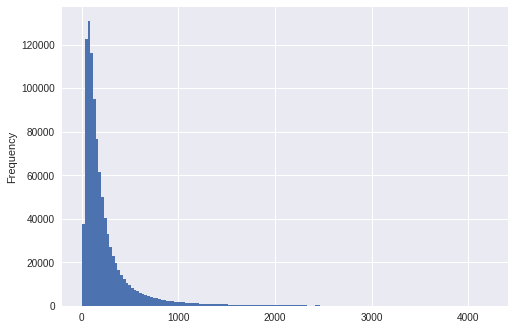

In [20]:
raw_data['desc_length'].plot.hist(bins=150)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7930468c18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f792fe8aeb8>], dtype=object)

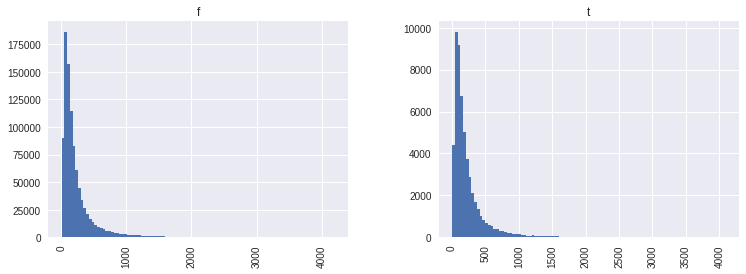

In [22]:
raw_data.hist(column='desc_length', by='predict_sold', bins=100, figsize=(12,4))

In [30]:
def is_new_param(serie):
    if 'new' in str(serie):
        return 1
    else:
        return 0

In [31]:
raw_data['new'] = raw_data['params'].apply(lambda x: is_new_param(x))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78eef4d0f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f78eeefc0f0>], dtype=object)

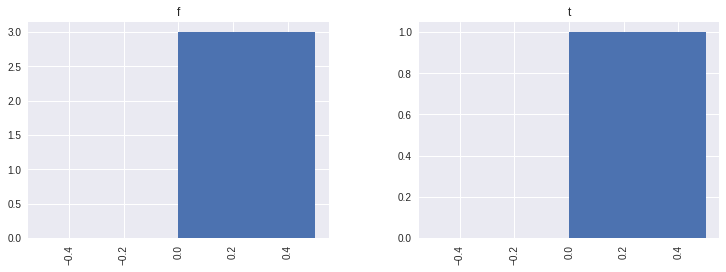

In [76]:
raw_data[raw_data['category_id'] == 188].hist(column='new', by='predict_sold', bins=2, figsize=(12,4))

In [46]:
raw_data[raw_data['predict_sold'] == 't']['category_id'].value_counts().index.values[:10]

array([230, 642, 231,  93, 224, 282, 575, 734, 235, 506])

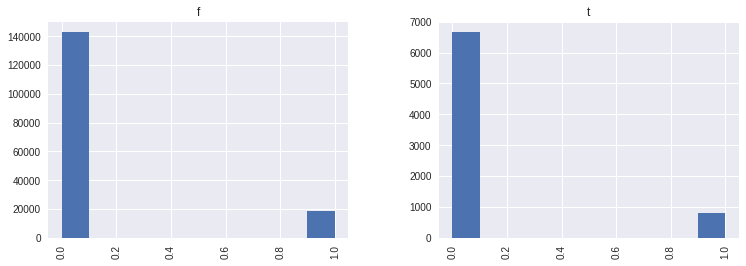

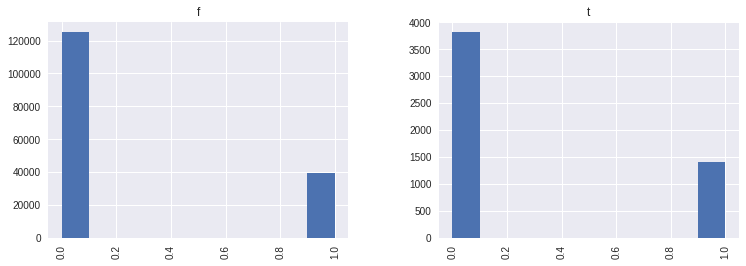

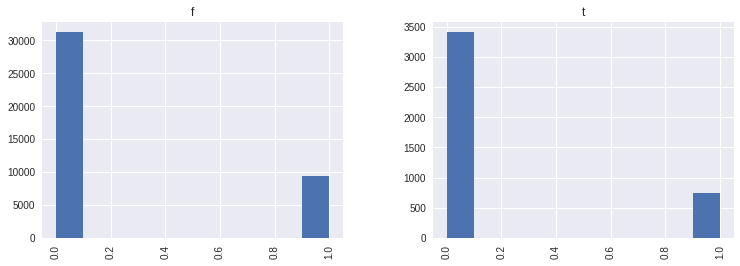

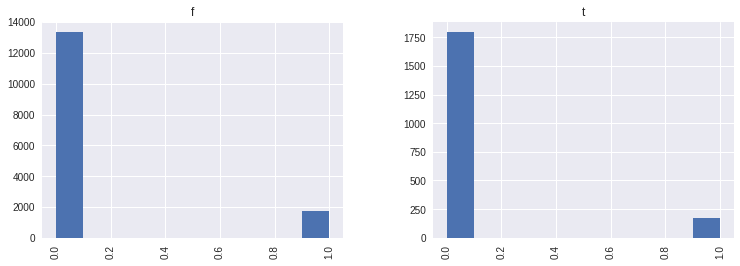

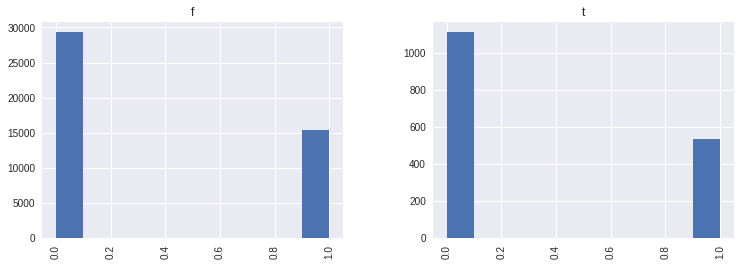

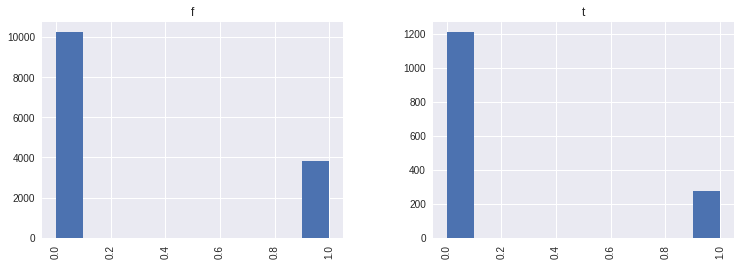

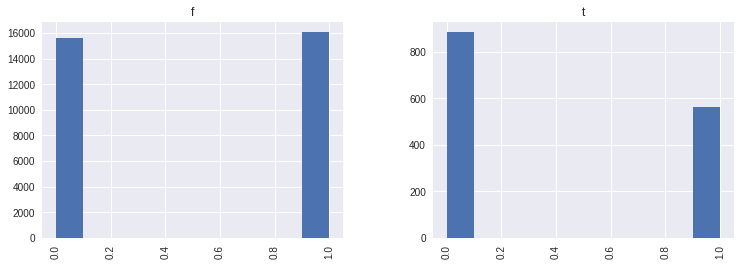

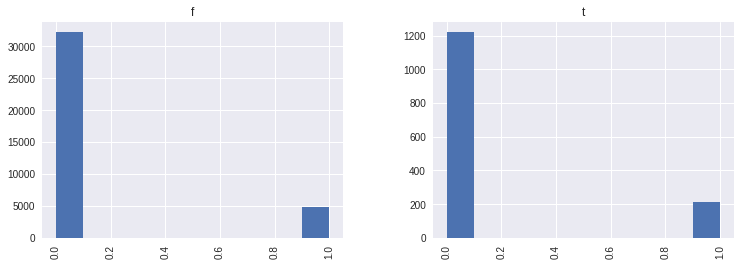

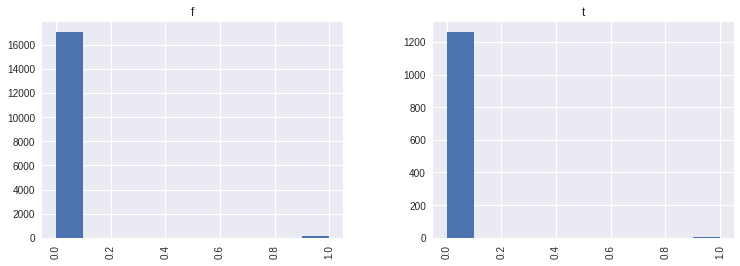

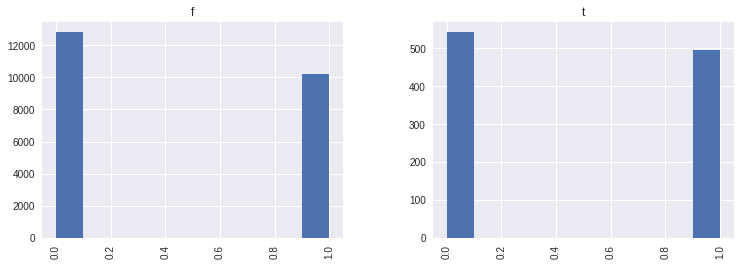

In [51]:
for x in raw_data[raw_data['predict_sold'] == 't']['category_id'].value_counts().index.values[:10]:
    print(
        raw_data[raw_data['category_id'] == x].hist(column='new', by='predict_sold', figsize=(12,4)))

Eventually sth interesting!!!

In [62]:
def get_percentage_of_sold(ad_df, category_id):
    all_ads = len(ad_df[ad_df['category_id'] == category_id]['predict_sold'])
    sold_ads = len(ad_df[(ad_df['category_id'] == category_id) & (ad_df['predict_sold'] == 't')]['predict_sold'])
    return sold_ads / all_ads

In [74]:
get_percentage_of_sold(raw_data, 111)

0.5

In [73]:
for i in range(1, 2000):
    try:
        print(i, get_percentage_of_sold(raw_data, i))
    except ValueError:
        pass
    except ZeroDivisionError:
        pass

6 0.014778325123152709
14 0.0
16 0.0
24 0.0
53 0.0
65 0.18181818181818182
80 0.0
93 0.11525383984054402
100 0.05940066119227898
111 0.5
140 0.1118421052631579
163 0.0
168 0.0
175 0.08011444921316166
179 0.0
180 0.14925373134328357
182 0.0
188 0.25
189 0.0
190 0.0
194 0.0
196 0.0
199 0.0
200 0.0
203 0.0
207 0.0
219 0.045735749005744585
224 0.03550474547023296
230 0.04421557311551096
231 0.09270842641408275
235 0.06851169844020798
236 0.1787709497206704
237 0.08403361344537816
238 0.2222222222222222
239 0.07692307692307693
240 0.10714285714285714
241 0.1780821917808219
243 0.13175470552519733
244 0.1206896551724138
245 0.14814814814814814
246 0.10989010989010989
247 0.09090909090909091
248 0.3
249 0.3076923076923077
250 0.14705882352941177
251 0.08211143695014662
252 0.18181818181818182
253 0.1111111111111111
254 0.17699115044247787
255 0.06451612903225806
256 0.1271186440677966
258 0.16780354706684858
272 0.0
279 0.060341974627688914
282 0.09559910054609701
292 0.030958145970252506
293 

In [77]:
raw_data.head()

,id,region_id,category_id,subregion_id,district_id,city_id,accurate_location,user_id,sorting_date,created_at_first,valid_to,title,description,full_description,has_phone,params,private_business,has_person,photo_sizes,paidads_id_index,paidads_valid_to,predict_sold,predict_replies,predict_views,reply_call,reply_sms,reply_chat,reply_call_intent,reply_chat_intent,desc_length,new
0,471113355,3,279,303,385.0,1721963681,0,2052953831,2016-11-28 09:11:10,2012-07-04 09:18:13,2016-12-28 09:11:10,Ekogroszek workowany Pieklorz <CITY> - POLMARK...,"Ekogroszek Pieklorz chwałowicki - ""Iskierka zi...","Ekogroszek Pieklorz chwałowicki - ""Iskierka zi...",t,price<=>price<br>price<=>940<br>state<=>new,business,t,"{""1"":{""w"":489,""h"":700}}",NaN,NaN,f,0,19,0,0,0,0,0,1819,1
1,611926916,15,292,21,NaN,959198913,0,1491762096,2016-11-29 07:50:45,2012-07-04 20:39:19,2016-12-29 07:50:45,Poliwęglan komorowy kanalikowy z dostawą na te...,Witamy na stronie firmy K&M Technic\n\nJesteśm...,Witamy na stronie firmy K&M Technic\n\nJesteśm...,t,price<=>price<br>price<=>19<br>state<=>new,business,t,"{""2"":{""w"":1000,""h"":563},""1"":{""w"":933,""h"":700},...",4.0,2016-12-18 06:40:42,f,2,112,2,0,0,9,0,1182,1
2,222597611,4,1505,102,287.0,239224901,0,530730361,2016-11-25 13:22:18,2012-07-07 07:22:04,2016-12-25 13:22:18,DJ na wesele <CITY> DJ Weselny <CITY> PROMOCYJ...,Skorzystaj z cen promocyjnych od Stycznia do M...,Skorzystaj z cen promocyjnych od Stycznia do M...,t,NaN,private,t,"{""6"":{""w"":640,""h"":426},""1"":{""w"":1000,""h"":666},...",NaN,NaN,f,1,9,0,0,1,2,1,1674,0
3,660662971,2,575,287,381.0,2056888083,0,1581613515,2016-11-23 21:43:16,2012-06-26 22:02:18,2016-12-23 21:50:18,Obrazy jak oryginały,Obrazy w porządnych ramach ( robione na zamówi...,Obrazy w porządnych ramach ( robione na zamówi...,t,price<=>price<br>price<=>130<br>state<=>used,private,t,"{""2"":{""w"":346,""h"":461},""1"":{""w"":616,""h"":461}}",NaN,NaN,f,0,1,0,0,0,0,0,226,0
4,144496390,1,279,190,NaN,1640171958,0,1447566944,2016-11-26 13:55:17,2012-07-06 11:30:25,2016-12-26 14:36:59,"KOMINEK MARKOWY, efekt żarzenia, ""<SURNAME> <N...","KOMINEK FIRMY ZEPTER ""<SURNAME> <NAME> Serce"" ...","KOMINEK FIRMY ZEPTER ""<SURNAME> <NAME> Serce"" ...",t,price<=>arranged<br>price<=>950<br>state<=>new,private,t,"{""1"":{""w"":616,""h"":461},""2"":{""w"":616,""h"":461},""...",NaN,NaN,f,0,13,0,0,0,0,0,948,1


In [78]:
sq_december[sq_december['category_id'] == 15].count()

sorting_date      54751
phrase            54732
category_id       54751
sessions_count    54751
parent_id         54751
name_pl           54751
dtype: int64

In [105]:
raw_data[(raw_data['predict_sold'] == 'f') & (raw_data['paidads_id_index'] > 0)]['full_description'].count()

227723

In [104]:
sq_december.head()

,sorting_date,phrase,category_id,sessions_count,parent_id,name_pl
0,2016-11-21,NaN,15.0,85916.0,1307,Wynajem
1,2016-11-21,kawalerka,15.0,968.0,1307,Wynajem
2,2016-11-21,mieszkanie,15.0,183.0,1307,Wynajem
3,2016-11-21,warszawa,15.0,154.0,1307,Wynajem
4,2016-11-21,2 pokoje,15.0,150.0,1307,Wynajem


In [118]:
raw_data[raw_data['predict_sold'] == 't'].groupby('region_id').count()['id'] / raw_data[raw_data['predict_sold'] == 'f'].groupby('region_id').count()['id']

region_id
1     0.056873
2     0.055487
3     0.057723
4     0.053745
5     0.061225
6     0.063163
7     0.057002
8     0.055773
9     0.055177
11    0.058152
12    0.051648
13    0.053657
14    0.059675
15    0.063243
17    0.055183
18    0.050393
Name: id, dtype: float64

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer()
corpus_cat15 = sq_data[(sq_data['category_id'] == 15)]['phrase'].dropna()
X = vectorizer.fit_transform(corpus_cat15)

In [25]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
vectorizer.get_feature_names()

['00',
 '001',
 '01',
 '02',
 '021',
 '02672',
 '029',
 '03',
 '040',
 '05',
 '061',
 '0ahukewj61omzrbnqahxjxbokhb0fbvsqfggdmaa',
 '0drz',
 '0rgan0wa',
 '0rgan6wa',
 '10',
 '100',
 '1000',
 '10000',
 '1000zl',
 '1000zł',
 '100m2',
 '103',
 '1077',
 '10km',
 '11',
 '110',
 '1100',
 '1100zl',
 '112',
 '113',
 '1150',
 '116',
 '1192679687',
 '11kg',
 '12',
 '120',
 '1200',
 '125',
 '126',
 '126p',
 '128',
 '12a',
 '12m',
 '12zl',
 '13',
 '1300',
 '132',
 '134',
 '1350',
 '13a',
 '14',
 '1400',
 '140x200',
 '1450',
 '14500',
 '147',
 '15',
 '1500',
 '1500zl',
 '155686',
 '1564',
 '158',
 '159',
 '15m',
 '16',
 '160',
 '1600',
 '1600zł',
 '160x200',
 '161757611',
 '1634',
 '164',
 '168',
 '17',
 '172',
 '173000',
 '175',
 '176807843',
 '178',
 '18',
 '1800',
 '1800zł',
 '186200495',
 '18m2',
 '19',
 '190',
 '191518139',
 '192',
 '195',
 '197',
 '1995',
 '1dzień',
 '1go',
 '1m',
 '1os',
 '1p',
 '1pok',
 '1pokoe',
 '1pokoje',
 '1pokojowe',
 '1pokuj',
 '1pokój',
 '20',
 '200',
 '2000',
 '2001'

In [ ]:
amount = 0
for ind in range(raw_data[raw_data['predict_sold'] == 't']['description'].count()):
    if 'kawalerka' in raw_data[raw_data['predict_sold'] == 't']['description'].iloc[ind]:
        print(ind)

In [28]:
from string import punctuation
from operator import itemgetter

In [52]:
stop_words = []
with open('src/learn/polish_stopwords.txt', 'r') as f:
    stop_words = [line[:-1] for line in f]
numbers = ['0', '1', '2','3', '4', '5', '6', '7', '8' ,'9']
stop_words += numbers

In [53]:
stop_words

['a',
 'aby',
 'ach',
 'acz',
 'aczkolwiek',
 'aj',
 'albo',
 'ale',
 'alez',
 'ależ',
 'ani',
 'az',
 'aż',
 'bardziej',
 'bardzo',
 'beda',
 'bedzie',
 'bez',
 'deda',
 'będą',
 'bede',
 'będę',
 'będzie',
 'bo',
 'bowiem',
 'by',
 'byc',
 'być',
 'byl',
 'byla',
 'byli',
 'bylo',
 'byly',
 'był',
 'była',
 'było',
 'były',
 'bynajmniej',
 'cala',
 'cali',
 'caly',
 'cała',
 'cały',
 'ci',
 'cie',
 'ciebie',
 'cię',
 'co',
 'cokolwiek',
 'cos',
 'coś',
 'czasami',
 'czasem',
 'czemu',
 'czy',
 'czyli',
 'daleko',
 'dla',
 'dlaczego',
 'dlatego',
 'do',
 'dobrze',
 'dokad',
 'dokąd',
 'dosc',
 'dość',
 'duzo',
 'dużo',
 'dwa',
 'dwaj',
 'dwie',
 'dwoje',
 'dzis',
 'dzisiaj',
 'dziś',
 'gdy',
 'gdyby',
 'gdyz',
 'gdyż',
 'gdzie',
 'gdziekolwiek',
 'gdzies',
 'gdzieś',
 'go',
 'i',
 'ich',
 'ile',
 'im',
 'inna',
 'inne',
 'inny',
 'innych',
 'iz',
 'iż',
 'ja',
 'jak',
 'jakas',
 'jakaś',
 'jakby',
 'jaki',
 'jakichs',
 'jakichś',
 'jakie',
 'jakis',
 'jakiś',
 'jakiz',
 'jakiż',
 'jak

In [108]:
N = 111
words = {}
for _, row in sq_data[(sq_data['category_id'] == 230)][['phrase', 'sessions_count']].dropna().iterrows():
    for word in row['phrase'].split():
        word = word.strip(punctuation).lower()
        if word not in stop_words and len(word) > 3:
            words[word] = words.get(word, 0) + row['sessions_count']

In [109]:
top_words = sorted(words.items(), key=lambda x: x[1], reverse=True)[:N]

In [110]:
vectorizer = CountVectorizer()
corpus_cat230 = list(map(lambda x: x[0], top_words))
X230 = vectorizer.fit_transform(corpus_cat230)

In [111]:
vectorizer.get_feature_names()

['adidas',
 'alba',
 'baggy',
 'biala',
 'biała',
 'bluza',
 'bluzeczka',
 'bluzka',
 'bluzki',
 'body',
 'buty',
 'chrzest',
 'chrztu',
 'chłopca',
 'club',
 'coccodrillo',
 'cocodrillo',
 'cool',
 'czapka',
 'czapki',
 'czerwona',
 'disney',
 'dres',
 'dresowe',
 'dresy',
 'dzieci',
 'dziewczynka',
 'dziewczynki',
 'elegancka',
 'futerko',
 'garnitur',
 'getry',
 'jeansy',
 'kamizelka',
 'kappahl',
 'karnawałowy',
 'kombinezon',
 'komin',
 'komplet',
 'koszula',
 'koszulka',
 'kraina',
 'kurteczka',
 'kurtka',
 'kurtki',
 'legginsy',
 'leginsy',
 'lodu',
 'marynarka',
 'mayoral',
 'mega',
 'miki',
 'mikolaj',
 'mikolaja',
 'mikołaj',
 'minnie',
 'myszka',
 'narciarska',
 'narciarskie',
 'next',
 'nike',
 'ocieplane',
 'ogrodniczki',
 'pajac',
 'pajacyk',
 'paka',
 'parka',
 'peppa',
 'pizama',
 'piżama',
 'plaszczyk',
 'przebranie',
 'płaszczyk',
 'rajstopy',
 'reima',
 'rekawiczki',
 'reserved',
 'rurki',
 'rękawiczki',
 'smyk',
 'spodenki',
 'spodniczka',
 'spodnie',
 'spódniczka',

In [82]:
for _, row in sq_data[(sq_data['category_id'] == 15) & (sq_data['phrase'].str.contains('mieszkanie'))][['phrase', 'sessions_count']].iterrows():
    print(row[0], '-->', row[1])

mieszkanie --> 183.0
wynajmę mieszkanie --> 15.0
mieszkanie wynajem --> 6.0
mieszkanie 2 pokoje --> 6.0
mieszkanie saska kepa --> 5.0
mieszkanie do wynajęcia --> 5.0
wynajme mieszkanie --> 4.0
mieszkanie do wynajecia --> 4.0
mieszkanie lomza --> 4.0
mieszkanie w bloku --> 4.0
mieszkanie 2 pokojowe --> 4.0
nowe mieszkanie --> 3.0
mieszkanie na wynajem --> 3.0
mieszkanie dwupokojowe --> 3.0
mieszkanie do wynajęci --> 3.0
mieszkanie w bielsku --> 3.0
mieszkanie warszawa --> 3.0
mieszkanie wynajmę --> 3.0
tychy mieszkanie --> 2.0
wrocław mieszkanie --> 2.0
mieszkanie. czuby --> 2.0
tanio mieszkanie --> 2.0
mieszkanie 3 pokojowe --> 2.0
mieszkanie jelonki --> 2.0
mieszkanie do wynajęcia sroda wlkp --> 2.0
wynajęcia mieszkanie --> 2.0
torun mieszkanie --> 2.0
mieszkanie .wynajem --> 2.0
mieszkanie na --> 2.0
mieszkanie nowa huta --> 2.0
mieszkanie kraków --> 2.0
mieszkanie z o --> 2.0
mieszkanie do wynajem --> 2.0
mieszkanie 3 pokoje --> 2.0
mieszkanie do wynajecia 5 pokojowe mieszkanie --> 

wynajmę mieszkanie --> 15.0
mieszkanie do wynajecia --> 10.0
mieszkanie do wynajęcia --> 8.0
mieszkanie 2 pokoje --> 5.0
mieszkanie do wynajem --> 4.0
wynajme mieszkanie --> 4.0
mieszkanie dwupokojowe --> 4.0
mieszkanie na wynajem --> 3.0
mieszkanie do --> 3.0
wrocław mieszkanie --> 3.0
płock mieszkanie --> 3.0
mieszkanie do wynajecia warszawa --> 2.0
mieszkanie 3 pokojowe --> 2.0
mieszkanie krakow --> 2.0
mieszkanie wynajem --> 2.0
mieszkanie legnica --> 2.0
mieszkanie końskie --> 2.0
mieszkanie bielany --> 2.0
mieszkanie lub dom --> 2.0
mieszkanie do remont --> 2.0
mieszkanie ul. orłowicza --> 1.0
mieszkanie bartoszyce --> 1.0
mieszkanie do wynajecia legionowo --> 1.0
mieszkanie ul.obywatelska --> 1.0
wynajmnę mieszkanie --> 1.0
mieszkanie lubin --> 1.0
mieszkanie 36m2 --> 1.0
mieszkanie wrzeszcz --> 1.0
opieka w zamian mieszkanie --> 1.0
mieszkanie legionowo --> 1.0
wynajme mieszkanie kozanow wroclaw --> 1.0
wysoki mazowiec mieszkanie --> 1.0
mieszkanie malbork --> 1.0
nowe mieszkan

mieszkanie stawki --> 1.0
mieszkanie zamość --> 1.0
mieszkanie za --> 1.0
mieszkanie bloki --> 1.0
mieszkanie olesno --> 1.0
mieszkanie blonie --> 1.0
mieszkanie mielec --> 1.0
żolliborz mieszkanie --> 1.0
mieszkanie... --> 1.0
mieszkanie warszawa targowek --> 1.0
mieszkanie 40m --> 1.0
mieszkanie niepodległości --> 1.0
szukam dwu pokojowe mieszkanie na wynajem --> 1.0
ladne mieszkanie --> 1.0
małogoszcz mieszkanie --> 1.0
wynajme mieszkanie krasnik fabryczny --> 1.0
trzypokojowe mieszkanie --> 1.0
mieszkanie odstąpię --> 1.0
mieszkanie o wynajęcia prawobrzeze --> 1.0
mieszkanie za 990 zl --> 1.0
mieszkanie poznań --> 1.0
sopot mieszkanie --> 1.0
mieszkanie lgbt --> 1.0
mieszkanie czyżkówko --> 1.0
mieszkanie zagłoby --> 1.0
zgierz mieszkanie --> 1.0
mieszkanie borek --> 1.0
mieszkanie opatów --> 1.0
mieszkanie dwupokojowe gdynia pustki cisowskie --> 1.0
mieszkanie malbork --> 1.0
mieszkanie z ogrodkiem --> 1.0
mieszkanie siedlce --> 1.0
mieszkanie starogard --> 1.0
mieszkanie m 3 --> 

In [145]:
test_example = raw_data[(raw_data['predict_sold'] == 'f') &
                        (raw_data['category_id'] == 230)]['description'].iloc[4]

In [146]:
words_test = []
for word in test_example.split():
    word = word.strip(punctuation).lower()
    if word not in stop_words and len(word) > 3:
        words_test.append(word)
print(words_test)

['zielona', 'bawełniana', 'koszulka', 'firmy', 'adams', 'rozmiar', 'metki', '0-3m', '62cm', 'dokładne', 'wymiary', 'długość', '27cm', 'długość', 'rękawa', 'ramię/pacha', '17cm/12cm', 'szerokość', 'paszkami', '24cm', 'koszulka', 'przodu', 'naszytą', 'kieszonkę', 'bawełniane', 'spodenki']


In [147]:
vectorizer.transform([test_example]).toarray().sum()

3

In [153]:
raw_data[(raw_data['predict_sold'] == 'f') &
                        (raw_data['category_id'] == 230)][['description', 'params']].iloc[1]

description    Bezrękawnik, 100% poliester, może być dla dzie...
params         price<=>price<br>price<=>20<br>state<=>used<br...
Name: 34, dtype: object

In [155]:
ads_december.columns

Index(['id', 'region_id', 'category_id', 'subregion_id', 'district_id',
       'city_id', 'accurate_location', 'user_id', 'sorting_date',
       'created_at_first', 'valid_to', 'title', 'description',
       'full_description', 'has_phone', 'params', 'private_business',
       'has_person', 'photo_sizes', 'paidads_id_index', 'paidads_valid_to',
       'predict_sold', 'predict_replies', 'predict_views', 'reply_call',
       'reply_sms', 'reply_chat', 'reply_call_intent', 'reply_chat_intent',
       'parent_id', 'name_pl', 'priceType', 'priceValue', 'state', 'type',
       'mark', 'size'],
      dtype='object')

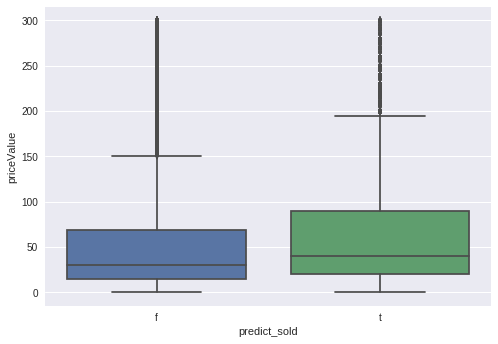

In [186]:
sns.boxplot(x='predict_sold', y='priceValue', data=ads_december[ads_december['priceValue'] < 300])

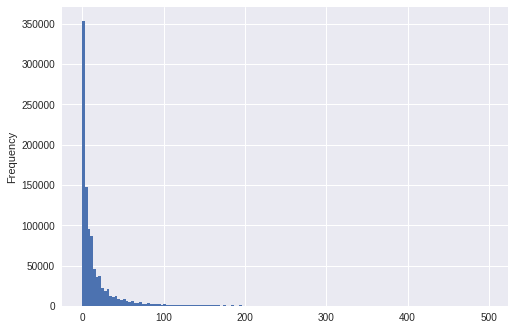

In [181]:
ads_december[ads_december['predict_views'] < 500]['predict_views'].plot.hist(bins=150)

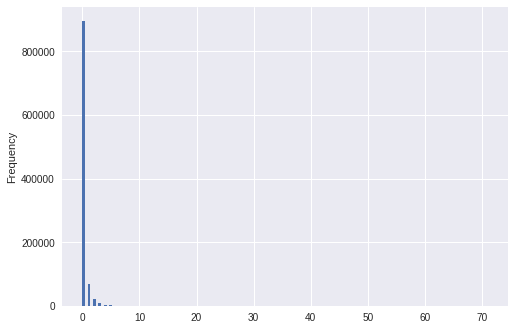

In [184]:
ads_december[ads_december['predict_replies'] < 100]['predict_replies'].plot.hist(bins=150)

In [190]:
print(ads_december[ads_december['predict_sold'] == 't']['priceValue'].describe(), end='\n\n')
print(ads_december[ads_december['predict_sold'] == 'f']['priceValue'].describe())

count     52489.000000
mean        270.408430
std        2609.073641
min           0.010000
25%          24.000000
50%          50.000000
75%         150.000000
max      460000.000000
Name: priceValue, dtype: float64

count    9.257100e+05
mean     5.280188e+02
std      1.290807e+05
min      1.000000e-02
25%      1.999000e+01
50%      4.000000e+01
75%      1.000000e+02
max      1.234568e+08
Name: priceValue, dtype: float64


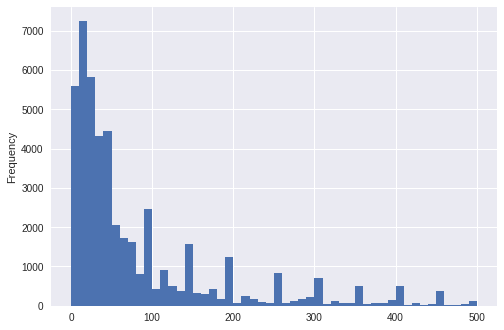

In [192]:
ads_december[(ads_december['predict_sold'] == 't') & 
             (ads_december['priceValue'] < 500)]['priceValue'].plot.hist(bins=50)

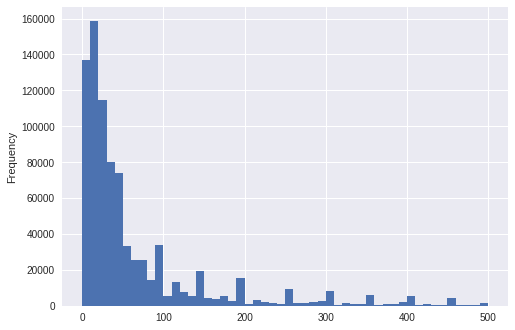

In [195]:
ads_december[(ads_december['predict_sold'] == 'f') & 
             (ads_december['priceValue'] < 500)]['priceValue'].plot.hist(bins=50)

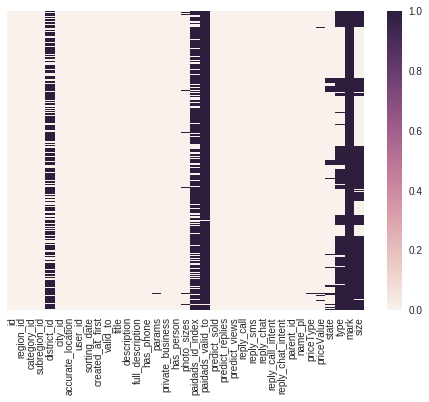

In [199]:
sns.heatmap(ads_december.isnull(), yticklabels=False)

In [204]:
ads_december['predict_sold'] = ads_december['predict_sold'].apply(lambda x: 0 if x == 'f' else 1)

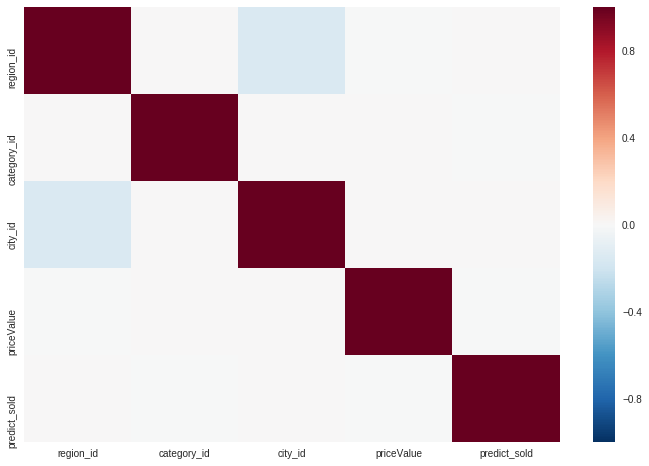

In [207]:
plt.figure(figsize=(12,8))
sns.heatmap(ads_december[['region_id', 'category_id', 'city_id', 'priceValue', 'predict_sold']].corr())

In [202]:
ads_december[['region_id', 'category_id', 'city_id', 'priceValue', 'predict_sold']]

,region_id,category_id,city_id,priceValue,predict_sold
0,3,279,1721963681,940.0,f
1,1,279,1640171958,950.0,f
2,4,279,239224901,1599.0,f
3,2,279,978427638,630.0,f
4,6,279,1547868440,22.0,f
5,15,279,1188177071,130.0,f
6,6,279,1020029081,1.0,f
7,9,279,1271766881,130.0,f
8,17,279,1757638379,160.0,f
9,12,279,1299092591,3490.0,f


In [209]:
false_ads = []
for row in raw_data[(raw_data['predict_sold'] == 'f') &
                        (raw_data['category_id'] == 230)]['description']:
    false_ads.append(vectorizer.transform([row]).toarray())

In [211]:
import numpy as np

In [212]:
np.asarray(false_ads).mean()

0.015127324258768754

In [213]:
true_ads = []
for row in raw_data[(raw_data['predict_sold'] == 't') &
                        (raw_data['category_id'] == 230)]['description']:
    true_ads.append(vectorizer.transform([row]).toarray())

In [214]:
np.asarray(true_ads).mean()

0.016397120011577844

In [220]:
false_means = list(map(lambda x: sum(x), false_ads))

In [221]:
false_means

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0,